In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Any results you write to the current directory are saved as output.

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train's shape:", train.shape)
print("test's shape;", test.shape)

train's shape: (1460, 81)
test's shape; (1459, 80)


In [8]:
train.index[]

2

In [49]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


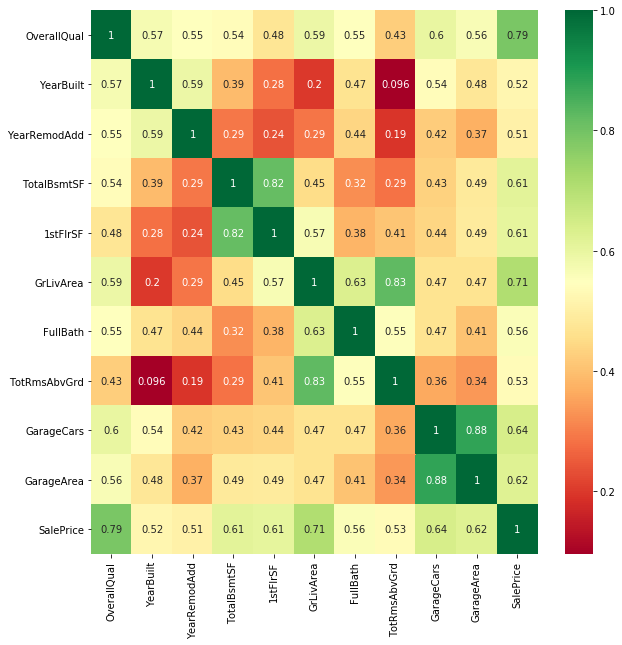

In [50]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [66]:
x_feat = ['YearBuilt', 'LotArea', 'BedroomAbvGr', 'KitchenAbvGr']
train_x = train[x_feat]
train_y = train.SalePrice
test_x = test[x_feat]

train_X, val_X, train_y, val_y = train_test_split(train_x,train_y,random_state=1)


In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#最小２乗法による偏係数
OLR = LinearRegression().fit(train_X, train_y)
y_pred = OLR.predict(val_X)

acc_OLR = round(mean_squared_error(y_pred, val_y) * 100, 2)
print(acc_OLR)

431162064908.2


In [9]:
X_feat = ['YearBuilt', 'LotFrontage', 'LotArea', 'HouseStyle', 'Heating', 'BedroomAbvGr', 'KitchenAbvGr', 'SaleType']
y = data.SalePrice
X = data[X_feat]
X_test = data_test[X_feat]
one_hot_encoded_training_predictors = pd.get_dummies(X)
one_hot_encoded_test_predictors = pd.get_dummies(X_test)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,join='left',axis=1)


In [10]:
d_model = make_pipeline(Imputer(), DecisionTreeRegressor(max_leaf_nodes=18,random_state=1))
r_model = make_pipeline(Imputer(), RandomForestRegressor(random_state=1))

train_X, val_X, train_y, val_y = train_test_split(final_train,y,random_state=1)

d_model.fit(train_X,train_y)
r_model.fit(train_X,train_y)

d_pre = d_model.predict(val_X)
r_pre = r_model.predict(val_X)

print(mean_absolute_error(d_pre,val_y))
print(mean_absolute_error(r_pre,val_y))

test_pre = r_model.predict(final_test)

output = pd.DataFrame({'Id': data_test.Id,
                       'SalePrice': test_pre})

output.to_csv('submission.csv', index=False)

37247.71364205452
35296.6003652968
